#### Logistic Regression from scratch

#### Logistic Regression
What is logistic regression?
-  Logistic Regression is supervised learning method that describes     relationship between dependent variable (discrete or categorical) and one or more  independent variables.
- Unlike linear regression, the job of logistic regression is to        predict the probability of discrete response variable.
-  Despite its name, it is a classification model rather than regression model.
- The most common logistic regression is binary logistic regression where dependent variable is binary or dichotomous . For example,  passing or failing the test,  high or low blood pressure , smoking and weight effect in pulse rate (High or low).
- There are more than two possible discrete outcomes in the multinominal logistic regression.
- The output values are bounded between 0 and 1 so they can be interpreted as probability.

 Just like Linear regression assumes that the data follows a linear function, Logistic regression models the  data using the sigmoid function.
 


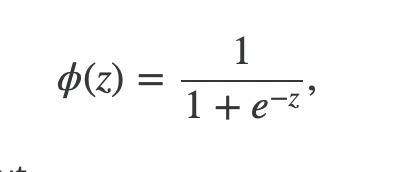

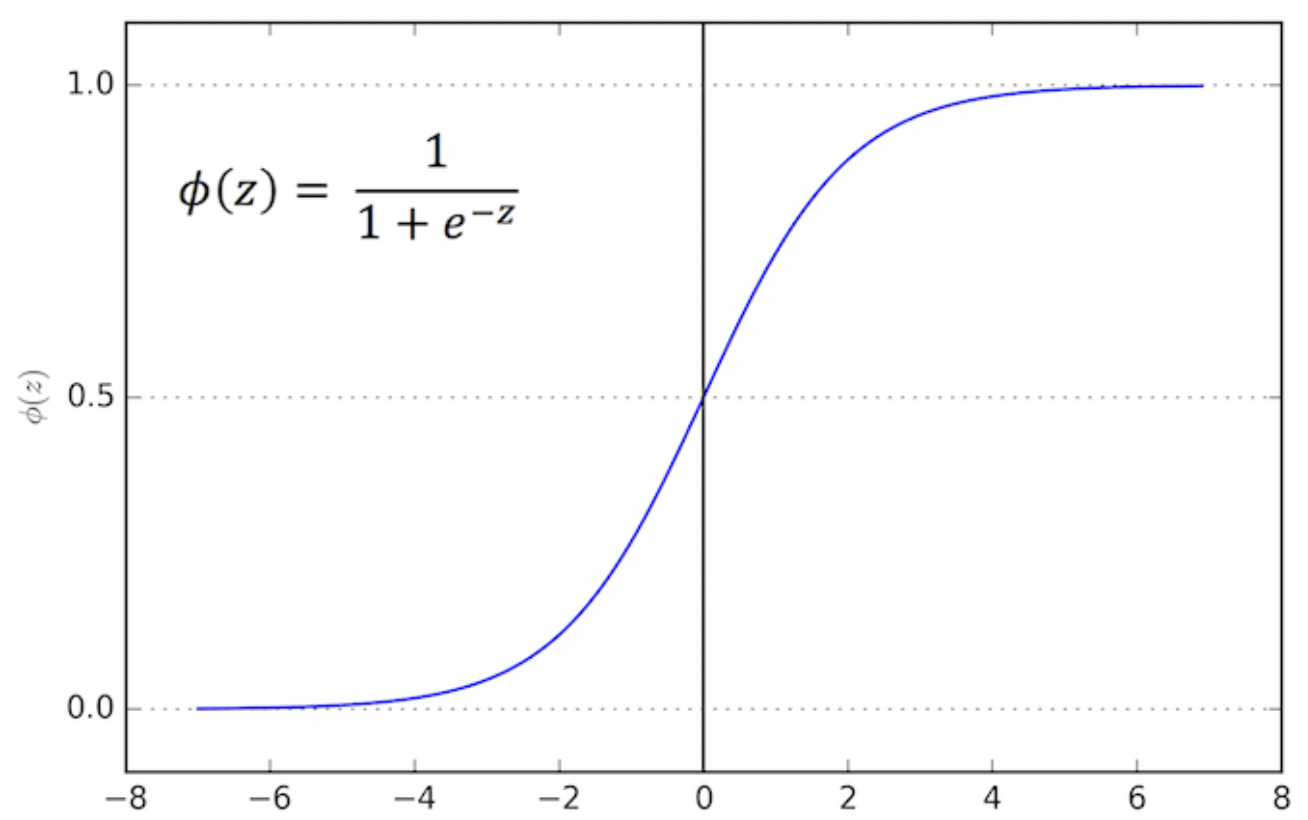

The toy data is created for performing logistic regression.

In [11]:
def create_toy_data():
    X = np.random.randint(10, 15, 10)
    X = np.concatenate((X, np.random.randint(20, 25, 10)), axis = 0)
    X = np.concatenate((X, np.random.randint(15, 20, 1)), axis = 0)
    
    y = np.empty_like(X)
    
    for i in range(len(X)):
        if X[i] < 15:
            y[i] = 0
        elif X[i] > 20:
            y[i] = 1
        else:
            y[i] = np.random.choice((1, 0))
            
    data = np.column_stack((X, y))
    np.random.shuffle(data)
    
    return data

In [12]:
import numpy as np
    
class LogisticRegression:
    """
        This is the scratch implementation of Logistic Regression
    """
    def __init__(self):
        self.param = {}
        self.param['W1'] = np.random.randn(1)
        self.param['b'] = np.zeros(1)
        
    # define train function
    def train(self, X, y, alpha = 0.001, epochs = 10):
        """
            This is the train function for Logistic Regression

        Parameters
        ----------
        X : Arrray
            DESCRIPTION.
        y : Array
            DESCRIPTION.
        alpha : TYPE, optional
            DESCRIPTION. The default is 0.001.
        epochs : TYPE, optional
            DESCRIPTION. The default is 10.

        Returns
        -------
        None.

        """
        for epoch in range(epochs):
            print("Epoch: ", epoch, end="")
            z = X * self.param['W1'] + self.param['b']
            
            y_pred = self.sigmoid(z)
            loss = self.evaluate(y, y_pred)
            
            print(", loss = ", loss)
            
            #Update the parameters
            self.param['W1'] = self.param['W1'] + alpha * np.sum(np.dot((y- y_pred), X[1]))
            self.param['b'] =  self.param['b'] + alpha * np.sum((y - y_pred))
            
        print(",Final Loss = ", loss)
        print("   W: {}, b = {}".format(self.param['W1'], self.param['b']))
    
    # define evaluate function
    def evaluate(self,y, y_pred):
        return np.average(y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))
    
    # define sigmoid function
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))



In [13]:
def main():
    log_model = LogisticRegression()
    data = create_toy_data()
    alpha = 0.01
    W = np.random.randn(1)
    b = np.zeros(1)
    X,  y = data[:, 0].reshape(len(data), 1), data[:, 1].reshape(len(data), 1)
    y_pred = log_model.sigmoid(W * X + b)
    log_model.train(X, y, alpha, epochs = 50)
    pred_to_class = [1 if p > 0.5 else 0 for p in y_pred]
    print("Accuracy of the Logistic model is ", accuracy_score(y, pred_to_class))


if __name__ == '__main__':
    main()    
        

Epoch:  0, loss =  3.4195241220117563
Epoch:  1, loss =  -20.677016461960722
Epoch:  2, loss =  1.9269041762921224
Epoch:  3, loss =  -22.179322297117007
Epoch:  4, loss =  0.9871907473662567
Epoch:  5, loss =  -19.420897077715487
Epoch:  6, loss =  2.740625976871018
Epoch:  7, loss =  -21.574348633635697
Epoch:  8, loss =  1.3596269591944004
Epoch:  9, loss =  -21.471773446997403
Epoch:  10, loss =  1.423559258352041
Epoch:  11, loss =  -21.65301976332805
Epoch:  12, loss =  1.3107677584910853
Epoch:  13, loss =  -21.307033261876192
Epoch:  14, loss =  1.5267727555102504
Epoch:  15, loss =  -21.87537594003924
Epoch:  16, loss =  1.173453847265132
Epoch:  17, loss =  -20.6978463671412
Epoch:  18, loss =  1.913557891285939
Epoch:  19, loss =  -22.179244771192206
Epoch:  20, loss =  0.987238146133079
Epoch:  21, loss =  -19.421303480933528
Epoch:  22, loss =  2.74036082590919
Epoch:  23, loss =  -21.574661555520315
Epoch:  24, loss =  1.3594323182904169
Epoch:  25, loss =  -21.4711643574

#### Logistic regression using sklearn


The logistic regression using sklearn library

In [14]:
#import libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
# use data that is created above 
data = create_toy_data()
df = pd.DataFrame(data, columns = ["X", "Y"])
df.head()

#split data and store in X and y
X = df[["X"]]
y = df[["Y"]]

In [31]:
#split dataset into train set and test set
random_state = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=random_state)
print(X_train.shape)
print(y_train.shape)

(16, 1)
(16, 1)


In [32]:
#use decision tree classifier
decisiontree_model = DecisionTreeClassifier(random_state=random_state)
#fit the data to the model
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# predict output values
y_pred = decisiontree_model.predict(X_test)

In [34]:
# calculate accuracy
decisiontree_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the decision tree model is ", decisiontree_accuracy)

The accuracy of the decision tree model is  1.0


#### Logisitic Regression Implementation on Diabetes dataset using sklearn

1. Import the libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Load the diabetes dataset

In [36]:
data = pd.read_csv("diabetes-2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Drop the missing values
data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
# Check columns of the dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Extract X as independent variable and y as target variable .

In [39]:
X = data.iloc[:, 0:8]
y = data[["Outcome"]]

Train - test split of the dataset with 80- 20 partition.

In [40]:
random_state = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=random_state)
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614, 1)


Decision tree classifier 

In [41]:
decisiontree_model = DecisionTreeClassifier(random_state=random_state)
decisiontree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = decisiontree_model.predict(X_test)

In [43]:
decisiontree_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the decision tree model is ", decisiontree_accuracy)

The accuracy of the decision tree model is  0.7857142857142857
